# 主成分分析

by Rene Zhang and Max Margenot

Part of the Quantopian Lecture Series:

* [www.quantopian.com/lectures](https://www.quantopian.com/lectures)
* [https://github.com/quantopian/research_public](https://github.com/quantopian/research_public)

---

在许多领域的应用，如图像处理、生物信息学和定量金融，涉及大规模数据。这些数据的大小和复杂性使得分析所需的计算在实际中不可行。主成分分析(PCA)是一种经典的降维方法。它使用前几个**主成分**，统计特性解释了$m \times n$数据矩阵$\mathbf{X}$的大部分变化，以经济的方式描述大型数据矩阵$\mathbf{X}$。   

In [1]:
from numpy import linalg as LA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

我们将通过一个图像处理的例子来介绍PCA。灰度数字图像可以表示为一个矩阵，其$(i,j)$项对应于第$(i,j)$个像素处的灰度测量。下面的灰度图像是$200 \times200$像素，不过可以动态更改。我们将它存储在一个矩阵$\mathbf{X}$中。$\mathbf{X}$的行数是$200$，$\mathbf{X}$的列数是$200$。

In [2]:
def generate_test_image(m,n):
    X = np.zeros((m,n))
# generate a rectangle
    X[25:80,25:80] = 1
# generate a triangle
    for i in range(25, 80, 1):
        X[i+80:160, 100+i-1] = 2
# generate a circle
    for i in range(0,200,1):
        for j in range(0,200,1):
            if (i - 135)*(i - 135) +(j - 53)*(j - 53) <= 900:
                X[i, j] = 3
    return X
X = generate_test_image(200,200)

我们从一个简单的棋盘模式开始，添加一些随机的正常噪声，并添加一个渐变。

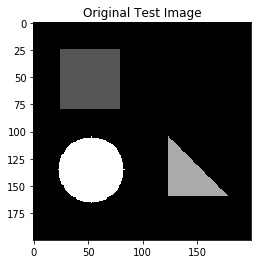

In [3]:
imgplot = plt.imshow(X, cmap='gray')
plt.title('Original Test Image');

In [4]:
m = X.shape[0] # num of rows
n = X.shape[1] # num of columns

将每一行设置为一个变量，在列中进行观察。将$\mathbf{X}$的协方差矩阵表示为$\mathbf{C}$，其中$\mathbf{C}$的大小为$m \times m$。$\mathbf{C}$是一个矩阵，它的第$(i,j)$项是矩阵$\mathbf{X}$的第$i$行和第$j$行之间的协方差。

In [5]:
X = np.asarray(X, dtype=np.float64)
C = np.cov(X)

In [6]:
np.linalg.matrix_rank(C)

62

主成分分析将矩阵$\mathbf{C}$分解为:

$$\mathbf{C} = \mathbf{L}\mathbf{P}\mathbf{L}^{\top},$$

其中$\mathbf{P}$是一个对角矩阵$\mathbf{P}=\text{diag}(\lambda_1,\lambda_2,\dots,\lambda_m)$，其中$\lambda_1 \geq \lambda_2 \geq \dots \lambda_m \geq 0$是矩阵$\mathbf{C}$的特征值。矩阵$\mathbf{L}$是一个正交矩阵，由矩阵$\mathbf{C}$的特征向量组成。

In [7]:
P, L = LA.eigh(C)

函数`LA.eigh`从小到大列出$P$中的特征值。让我们先将顺序从大到小进行更改，并确保$\mathbf{L}\mathbf{P}\mathbf{L}^{\top}==\mathbf{C}$。

In [8]:
P = P[::-1]
L = L[:,::-1]

In [9]:
np.allclose(L.dot(np.diag(P)).dot(L.T), C)

True

这里我们画出所有的特征值:

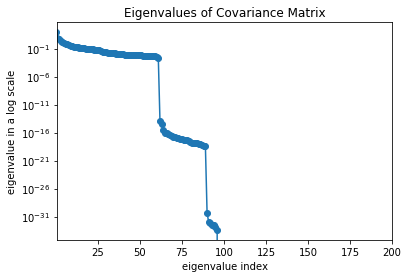

In [10]:
plt.semilogy(P, '-o')
plt.xlim([1, P.shape[0]])
plt.xlabel('eigenvalue index')
plt.ylabel('eigenvalue in a log scale')
plt.title('Eigenvalues of Covariance Matrix');

第$i$个**主成分**被表示为$\mathbf{V}$的第$i$行，

 $$\mathbf{V} =\mathbf{L}^{\top} \mathbf{X}.$$


In [11]:
V = L.T.dot(X)

In [12]:
V.shape

(200, 200)

如果我们在左边两边同时乘以$\mathbf{L}$，我们得到以下结果:

 $$\mathbf{L}\mathbf{L}^{\top} \mathbf{X}= \mathbf{L}\mathbf{V}.$$

矩阵$\mathbf{L}$是协方差矩阵的特征向量集合，因此$\mathbf{L}\mathbf{L}^{\top} = \mathbf{I}$和$\mathbf{L}\mathbf{L}^{\top}\mathbf{X} = \mathbf{X}$。$\mathbf{X}$、$\mathbf{L}$和$\mathbf{V}$之间的关系可以表示为
 
$$\mathbf{X} = \mathbf{L}\mathbf{V}.$$


为了近似$\mathbf{X}$，我们使用具有最大特征值的$k$个特征向量:

$$\mathbf{X} \approx \mathbf{L[:, 1:k]}\mathbf{L[:, 1:k]}^{\top} \mathbf{X}.$$

表示近似$\mathbf{X}$为$\tilde{\mathbf{X}} = \mathbf{L[:, 1:k]}\mathbf{L[:, 1:k]}^{\top} \mathbf{X}$。当$k = m $时，$\tilde{\mathbf{X}}$应该与$\mathbf{X}$相同。

In [13]:
k = 200
X_tilde =  L[:,0:k-1].dot(L[:,0:k-1].T).dot(X)

In [14]:
np.allclose(X_tilde, X)

True

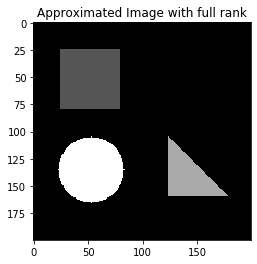

In [15]:
plt.imshow(X_tilde, cmap='gray')
plt.title('Approximated Image with full rank');

第$i$个主成分引起的总方差的比例由$\frac{\lambda_i}{\lambda_1 + \lambda_2 + \dots \lambda_m}$给出。总方差的比例之和应该是$1$。正如我们定义的，$\lambda_i$是$\mathbf{P}$的第$i$项，

$$\sum_{i}\frac{P_i}{\text{trace}(P)} = 1$$

其中trace$(P)$是$P$对角线的和。

In [16]:
(P/P.sum()).sum()

1.0

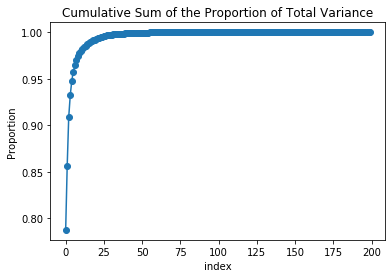

In [17]:
plt.plot((P/P.sum()).cumsum(), '-o')
plt.title('Cumulative Sum of the Proportion of Total Variance')
plt.xlabel('index')
plt.ylabel('Proportion');

主成分的数量记作$k$。以$k$等于$ 10,20,30,60 $为例，并查看相应的近似图像。

In [18]:
X_tilde_10 = L[:,0:10-1].dot(V[0:10-1,:])
X_tilde_20 = L[:,0:20-1].dot(V[0:20-1,:])
X_tilde_30 = L[:,0:30-1].dot(V[0:30-1,:])
X_tilde_60 = L[:,0:60-1].dot(V[0:60-1,:])

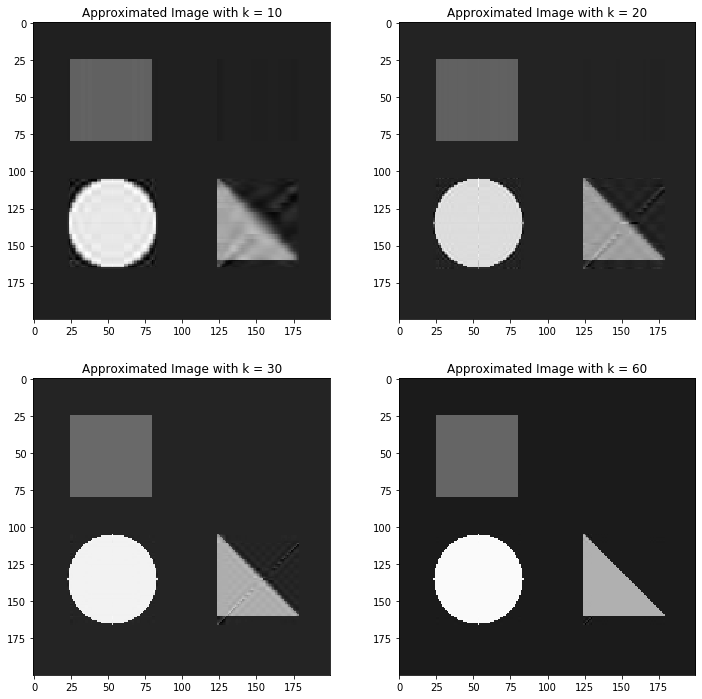

In [19]:
fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(12, 12))
ax1.imshow(X_tilde_10, cmap='gray')
ax1.set(title='Approximated Image with k = 10')
ax2.imshow(X_tilde_20, cmap='gray')
ax2.set(title='Approximated Image with k = 20')
ax3.imshow(X_tilde_30, cmap='gray')
ax3.set(title='Approximated Image with k = 30')
ax4.imshow(X_tilde_60, cmap='gray')
ax4.set(title='Approximated Image with k = 60');

$X$中的变量数是$200$。当降维为$k=60$时，使用了一半的主成分，近似后的图像与原始图像很接近。

接下来，我们不需要手动执行PCA。幸运的是，[scikit-learn](http://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html)有一个我们可以使用的实现。接下来，让我们展示一个使用sklearn的定量金融示例。

## 投资组合的主成分分析

构建一个包含10只股票的投资组合，包括IBM、MSFT、FB、T、INTC、ABX、NEM、AU、AEM、GFI。其中5家与科技相关，5家是金矿公司。

在本例中，有10个变量(公司)，每一列都是一个变量。

In [20]:
import yfinance as yf
symbol = ['IBM','MSFT', 'FB', 'T', 'INTC', 'GOLD','NEM', 'AU', 'AEM', 'GFI']

start = "2015-09-01"
end = "2016-11-01"

portfolio_returns = yf.download(symbol, start,end,)['Close'].pct_change()[1:]

[*********************100%***********************]  10 of 10 completed


In [21]:
from sklearn.decomposition import PCA
num_pc = 2

X = np.asarray(portfolio_returns)
[n,m] = X.shape
print('The number of timestamps is {}.'.format(n))
print('The number of stocks is {}.'.format(m))

pca = PCA(n_components=num_pc)  # number of principal components
pca.fit(X)

percentage = pca.explained_variance_ratio_
percentage_cum = np.cumsum(percentage)
print('{0:.2f}% of the variance is explained by the first 2 PCs'.format(percentage_cum[-1] * 100))

pca_components = pca.components_

The number of timestamps is 295.
The number of stocks is 10.
79.32% of the variance is explained by the first 2 PCs


请注意，这些资产回报率的大部分差异可以用前两个主要部分来解释。

现在我们收集前两个主成分并绘制它们的贡献。

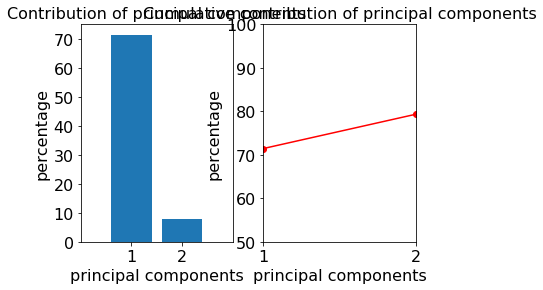

In [22]:
x = np.arange(1,len(percentage)+1)

plt.subplot(1, 2, 1)
plt.bar(x, percentage*100, align = "center")
plt.title('Contribution of principal components',fontsize = 16)
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([0, num_pc+1])

plt.subplot(1, 2, 2)
plt.plot(x, percentage_cum*100,'ro-')
plt.xlabel('principal components',fontsize = 16)
plt.ylabel('percentage',fontsize = 16)
plt.title('Cumulative contribution of principal components',fontsize = 16)
plt.xticks(x,fontsize = 16) 
plt.yticks(fontsize = 16)
plt.xlim([1, num_pc])
plt.ylim([50,100]);

从这些主成分我们可以构建“统计风险因素”，类似于更传统的常见风险因素。这些数据应该能让我们了解，有多少投资组合的回报来自一些不可观测的统计特征。

In [23]:
factor_returns = X.dot(pca_components.T)
factor_returns = pd.DataFrame(columns=["factor 1", "factor 2"], 
                              index=portfolio_returns.index,
                              data=factor_returns)
factor_returns.head()

,factor 1,factor 2
Date,,
2015-09-01,-0.096803,-0.019714
2015-09-02,-0.050461,0.046732
2015-09-03,-0.019119,-0.017593
2015-09-04,-0.014510,-0.038991
2015-09-08,0.018628,0.047403


这里的因子回报类似于图像处理示例中的主成分矩阵$\mathbf{V}$。

In [24]:
factor_exposures = pd.DataFrame(index=["factor 1", "factor 2"], 
                                columns=portfolio_returns.columns,
                                data = pca.components_).T

In [25]:
factor_exposures

,factor 1,factor 2
AEM,0.359150,0.262611
AU,0.487963,-0.115919
FB,-0.011136,0.377974
GFI,0.546307,-0.495838
GOLD,0.450804,0.229812
IBM,0.008130,0.320756
INTC,-0.003792,0.297088
MSFT,-0.009765,0.357062
NEM,0.360781,0.364166
T,0.027662,0.157512


在图像处理示例中，因子敞口与特征向量矩阵$\mathbf{L}$类似。

In [26]:
labels = factor_exposures.index
data = factor_exposures.values

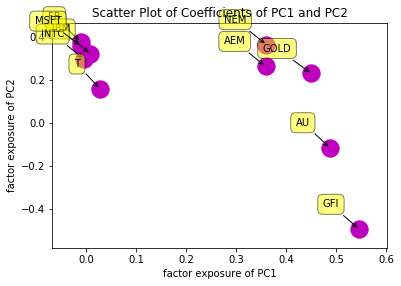

In [27]:
plt.subplots_adjust(bottom = 0.1)
plt.scatter(
    data[:, 0], data[:, 1], marker='o', s=300, c='m',
    cmap=plt.get_cmap('Spectral'))
plt.title('Scatter Plot of Coefficients of PC1 and PC2')
plt.xlabel('factor exposure of PC1')
plt.ylabel('factor exposure of PC2')

for label, x, y in zip(labels, data[:, 0], data[:, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-20, 20),
        textcoords='offset points', ha='right', va='bottom',
        bbox=dict(boxstyle='round,pad=0.5', fc='yellow', alpha=0.5),
        arrowprops=dict(arrowstyle = '->', connectionstyle='arc3,rad=0')
    );

创建统计风险因素可以让我们进一步分解投资组合的收益，从而更好地了解风险。这可以作为绩效归因之后的一个额外步骤，使用更常见的风险因素，比如那些在[Quantopian Risk Model](https://www.quantopian.com/risk-model)中的风险因素，来尝试解释额外的未知风险。


## 参考:
- Datta, B.N., 2010. *Numerical linear algebra and applications*. Siam.
- Qian, E.E., Hua, R.H. and Sorensen, E.H., 2007. *Quantitative equity portfolio management: modern techniques and applications*. CRC Press.